# Simple Linear Regression

In this notebook, we'll use **Simple Linear Regression** to predict each person's *salary* based on their *years of experience*.

This code will introduce you to how ML models work. It could be the first step in understanding ML's general and basic concepts.
Also, this code includes some practical metrics to evaluate how accurate different models and algorithms can be.

In this section, we'll work with the following key functions from the **scikit-learn** library:
- `train_test_split`  
- `LinearRegression`  

To install the scikit-learn library, run this command in your terminal or CMD:  
>pip install scikit-learn

Dataset: [Salary_Data](https://www.kaggle.com/datasets/ravitejakotharu/salary-datacsv)

In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Dataset
Use these methods to explore the dataset:
- `.head()` - Displays the first 5 rows
- `.describe()` - Shows statistical summary of the data

In [2]:
df_sal = pd.read_csv("Salary_Data.csv")
print (df_sal.head())
print ("\n" + "="*30 + "\n")
print (df_sal.describe())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


**Histplot plot:**

Use `sns.histplot()` to visualize the distribution of values in a specific feature:

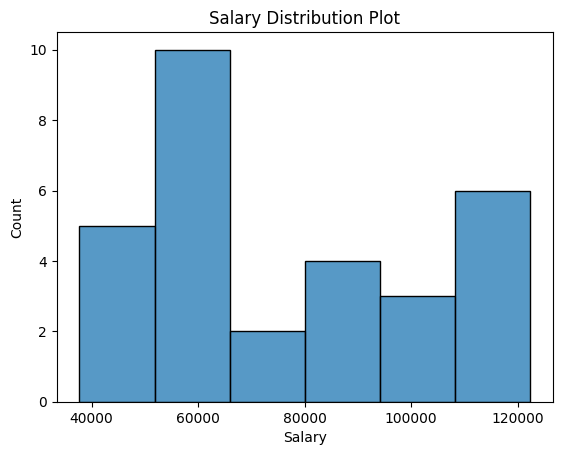

In [9]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.histplot(df_sal['Salary'])
plt.show()

## Splitting Variables

Now we need to specify:
- **Independent variables (X)**: Features used for prediction  
- **Dependent variable (y)**: Target feature to be predicted  

The relationship can be represented as:  
`y = f(X)`  

Where we use the independent features (X) to predict the target values (y).

In [5]:
X = df_sal.iloc[:, :1]
y = df_sal.iloc[:, 1:]

print (X.head(), "\n")
print (y.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2 

    Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0


**Scatter plot of relationship between Salary and Experience :**

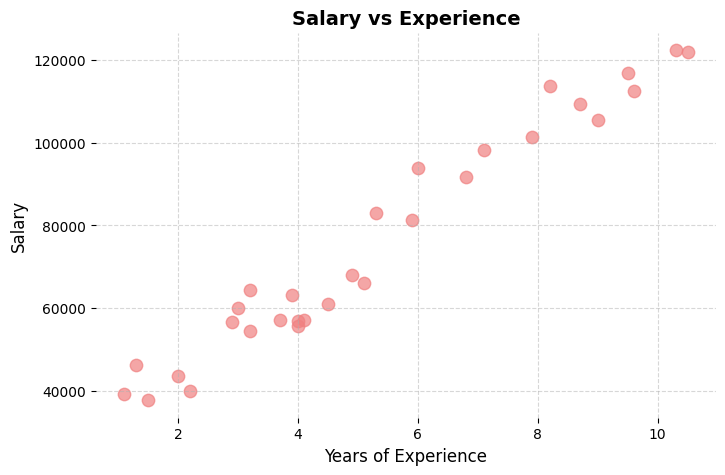

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color='lightcoral', s=80, alpha=0.7)
plt.title('Salary vs Experience', fontsize=14, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.box(False)
plt.show()

## Splitting Dataset into Training and Test Sets

We divide the dataset into two subsets:
- **Train set :** The model learns patterns from this data to make predictions
- **Test set:** Used to evaluate the model's accuracy on unseen data

Key parameters:
```python
test_size = 0.2  # 20% of data allocated to test set (80% for training)
random_state = 42  # Ensures reproducible splits

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Building the Regression Model

Based on the linear relationship observed in the scatter plot between Salary and YearsExperience, we'll implement a linear regression model:

```python
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # result : predicted value of y_test
y_pred_train = regressor.predict(X_train)   # result : predicted value of y_train

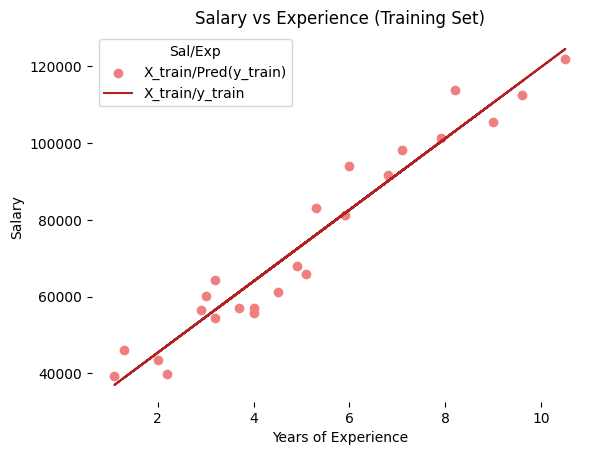

In [11]:
# Visualizing the prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_train)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

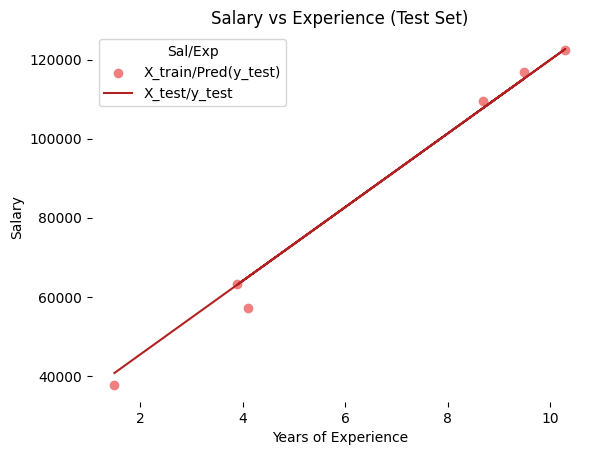

In [12]:
# Visualizing the prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_test, y_pred_test, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_test/y_test'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()